In [22]:
!pip install tensorflow-gpu

In [23]:
!nvidia-smi

Sat May  8 05:00:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    30W /  70W |    378MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [25]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/CropHealth /train1'
valid_path = '/content/drive/MyDrive/CropHealth /valid1'

In [27]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [29]:
for layer in inception.layers:
    layer.trainable = False

In [28]:
folders = glob('/content/drive/MyDrive/CropHealth /train1*')
folders

['/content/drive/MyDrive/CropHealth /train1']

In [30]:
x = Flatten()(inception.output)
x

<KerasTensor: shape=(None, 51200) dtype=float32 (created by layer 'flatten_2')>

In [31]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [32]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [33]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CropHealth /train1',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18355 images belonging to 10 classes.


In [36]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CropHealth /valid1',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')



Found 4585 images belonging to 10 classes.


In [37]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


InvalidArgumentError: ignored

In [ ]:


import matplotlib.pyplot as plt



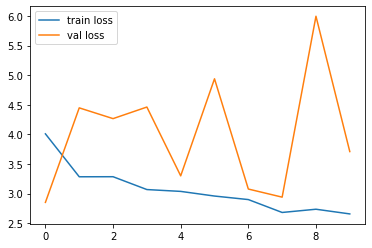

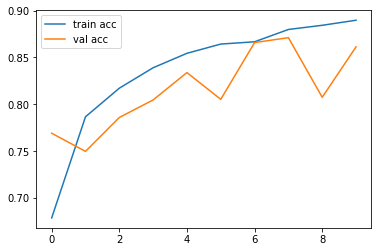

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

INFO:tensorflow:Assets written to: inception.model/assets


In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[4.3532321e-26, 2.8347979e-27, 6.3841942e-36, ..., 0.0000000e+00,
        9.9999988e-01, 0.0000000e+00],
       [3.4696005e-16, 9.9992990e-01, 1.6591932e-14, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 6.6089417e-21, 4.9867630e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:


import numpy as np
y_pred = np.argmax(y_pred, axis=1)



In [ ]:
y_pred

array([8, 1, 0, ..., 3, 8, 9])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/plantdisease/dataset/valid/Tomato___Bacterial_spot/014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255
x

array([[[6.45356204e-06, 5.62970308e-06, 5.76701268e-06],
        [1.02295826e-05, 9.40572318e-06, 9.54303323e-06],
        [9.13110398e-06, 8.30724457e-06, 8.44455462e-06],
        ...,
        [1.09847861e-05, 1.02295826e-05, 1.05042018e-05],
        [1.11907511e-05, 1.04355468e-05, 1.07101669e-05],
        [1.13280612e-05, 1.05728568e-05, 1.08474769e-05]],

       [[7.41473059e-06, 6.59087164e-06, 6.72818169e-06],
        [1.00922725e-05, 9.26841403e-06, 9.40572318e-06],
        [9.19975901e-06, 8.37589960e-06, 8.51320965e-06],
        ...,
        [1.11220961e-05, 1.03668917e-05, 1.06415118e-05],
        [1.12594062e-05, 1.05042018e-05, 1.07788219e-05],
        [1.13280612e-05, 1.05728568e-05, 1.08474769e-05]],

       [[9.19975901e-06, 8.37589960e-06, 8.51320965e-06],
        [1.00236175e-05, 9.19975901e-06, 9.33706815e-06],
        [9.06244895e-06, 8.23858954e-06, 8.37589960e-06],
        ...,
        [1.08474769e-05, 1.00922725e-05, 1.03668917e-05],
        [1.08474769e-05, 1.00

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:


model.predict(img_data)



array([[1.6928890e-26, 1.7750617e-09, 9.9996054e-01, 5.8010546e-23,
        2.0579356e-11, 1.3062262e-22, 8.4831391e-20, 3.0235976e-31,
        3.9495510e-05, 3.7124511e-18]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

array([2])

In [ ]:
#!zip -r /content/inception.zip /content/inception.model

  adding: content/inception.model/ (stored 0%)
  adding: content/inception.model/variables/ (stored 0%)
  adding: content/inception.model/variables/variables.index (deflated 79%)
  adding: content/inception.model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/inception.model/saved_model.pb (deflated 93%)
  adding: content/inception.model/assets/ (stored 0%)


In [ ]:
class_dict = training_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}